In [1]:
import os,sys,time
import matplotlib
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sys.path.append("./")
from PyQSOFit_wqy import QSOFit
from qsofit_add import *
from IPython.display import Image, display

In [2]:
def read_sdss_spec(filename):
    # read SDSS spectra
    spec = fits.getdata(filename,1)
    error = np.zeros(len(spec.ivar))
    error[np.where(spec.ivar!=0)] = 1/np.sqrt(spec.ivar[np.where(spec.ivar!=0)])
    return 10**spec.loglam, spec.flux, error

def read_sdssv_spec(filename):
    # read SDSS spectra
    spec = fits.getdata(filename,1)
    error = np.zeros(len(spec.IVAR))
    error[np.where(spec.IVAR!=0)] = 1/np.sqrt(spec.IVAR[np.where(spec.IVAR!=0)])
    return 10**spec.LOGLAM, spec.FLUX, error

In [3]:
# load the spectra
objID_arr = np.array(['5808-56325-0560', '4216-55477-0310', '00000-59345-06872194664'])
z_arr = np.array([2.119, 0.25, 0.0576])
ra_arr = np.array([138.9732534671791, 0.00197831, 141.60928197656156])
dec_arr = np.array([32.10551221553456, -0.45108831, 1.5902107862769135])
plate_arr = np.array([int(objid.split('-')[0]) for objid in objID_arr])
mjd_arr = np.array([int(objid.split('-')[1]) for objid in objID_arr])
id_arr = np.array([int(objid.split('-')[2]) for objid in objID_arr])

In [6]:
obj = 2
wave, flux, err = read_sdssv_spec('./spec/spec-'+objID_arr[obj]+'.fits') # read_sdss_spec or read_sdssv_spec
z = z_arr[obj]
ra = ra_arr[obj]
dec = dec_arr[obj]
plate = plate_arr[obj]
mjd = mjd_arr[obj]
fiber = id_arr[obj]

5808-56325-0560: UV spectral fitting (sdss4)

4216-55477-0310: opt spectral (sdss4 without host decomposition)

00000-59345-06872194664: opt spectral (sdss5 with host decomposition)

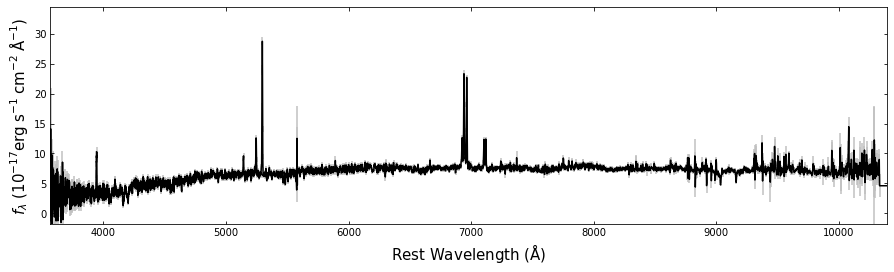

In [7]:
# the raw spectra plot
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.tick_params(which="both",bottom=True, top=True, left=True, right=True, direction='in')
ax.errorbar(wave, flux, yerr=err, \
            color='k', ecolor='silver', label='data', zorder=1)
ax.set_xlabel(r'Rest Wavelength ($\rm \AA$)', fontsize=15)
ax.set_ylabel(r'$ f_{\lambda}$ ($\rm 10^{-17} {\rm erg\;s^{-1}\;cm^{-2}\;\AA^{-1}}$)', fontsize=15)
ax.set_xlim(wave.min(), wave.max())
ax.set_ylim(-.5*abs(flux.min()), 1.2*flux.max())
plt.show()

In [8]:
t0 = time.time()

qso = QSOFit(wave, flux, err, z, ra = ra, dec = dec, plateid = plate, mjd = mjd, fiberid = fiber,
            target_info=None, path = './')

qso.Fit(name='op_'+objID_arr[obj], 
            nsmooth=1, # n-pixel smoothing
            and_or_mask=False, wave_range=None, wave_mask=None, reject_badpix=False, # mask on the spec
            deredden=True, # correct the Milky Way extinction
            decomposition_host=True, BC03=False, Mi=None, npca_gal=5, npca_qso=20, # host decomposition
            Fe_uv_op=True, Fe_flux_range=None, # fit FeII continuum
            poly = True, BC = False, rej_abs = True, # continuum components
            rej_line_abs=True, rej_line_max_niter=2, # reject absorption pixels in complex lines
            initial_guess=None, MC=True, n_trails=10, # inital guess on gaussians and MCMC
            if_localfit=True, if_save_localfit=True, if_plot_localfit=True, 
            if_tie_localfit=True, save_localfit_plot_path='./op/', #local fit 
            linefit=True, tie_lambda=True, tie_width=True, tie_flux_1=False, tie_flux_2=False, # tie parameters
            plot_fig=True, save_fig=True, plot_line_name=True, plot_legend=True, save_fig_path='./op/', # plots
            dustmap_path='./dust/', # dust map path
            save_result=True, save_fits_path='./op/', save_fits_name=None, 
            if_read_line_prop = False, if_dump_MC_result = True, if_save_spec = True # save the results
        )

print('time=%.3f'%(time.time()-t0)+'s')

time=35.779s


Then in `op`, you will find the output fits file `op_objID.fits` that store the fitting results and the QA plot `op_objID.pdf` for this object (similar to this).

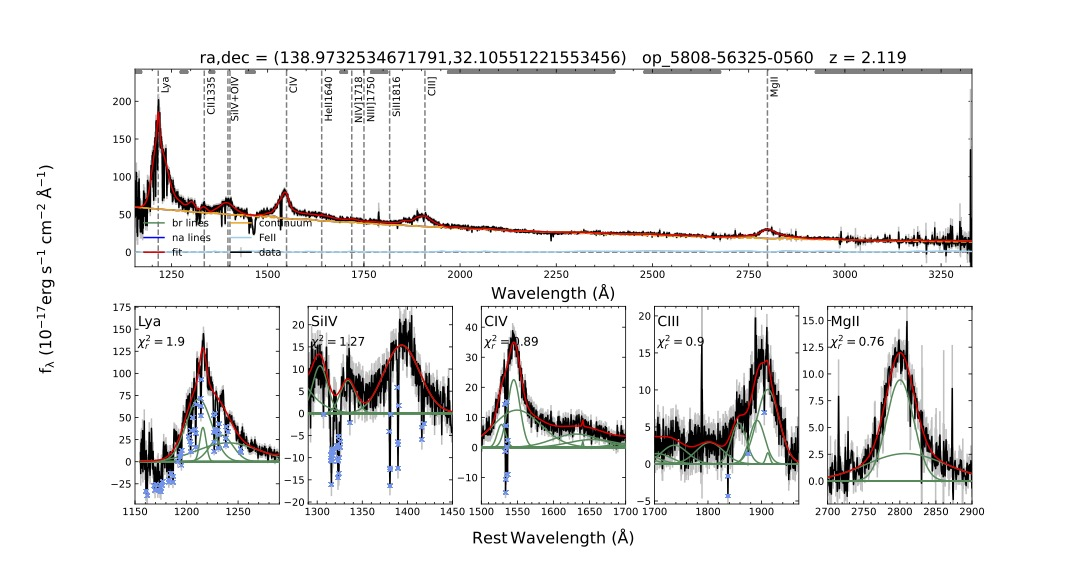

In [9]:
display(Image(filename='./showcase.jpg'))

In [10]:
# read output fits file

op_data = fits.getdata('./op/op_'+objID_arr[obj]+'.fits', 1)
op_data_MC = fits.getdata('./op/op_'+objID_arr[obj]+'.fits', 2)
op_data_spec = fits.getdata('./op/op_'+objID_arr[obj]+'.fits', 3)

In [11]:
# continuum luminosity
print('LogL5100=%.3f'%(op_data.L5100[0])+'\n')
print('LogL3000=%.3f'%(op_data.L3000[0])+'\n')
print('LogL1350=%.3f'%(op_data.L1350[0])+'\n')

# line properties
line_para = get_line_prop('HBETA_BR', op_data, op_data_MC)
line_para = get_line_prop('MGII_BR', op_data, op_data_MC)
line_para = get_line_prop('CIV', op_data, op_data_MC)

LogL5100=41.566

LogL3000=0.000

LogL1350=0.000

HBETA_BR
Peak wavelength:  4867.67+-5.37
Flux:  5.36+-7.74
LogL:  38.63+-0.51
FWHM:  1413.98+-27.21
EW:  6.01+-8.69

MGII_BR
Peak wavelength:  0.0+-0.0
Flux:  0.0+-0.0
LogL:  0.0+-0.0
FWHM:  0.0+-0.0
EW:  0.0+-0.0

CIV
Peak wavelength:  0.0+-0.0
Flux:  0.0+-0.0
LogL:  0.0+-0.0
FWHM:  0.0+-0.0
EW:  0.0+-0.0

